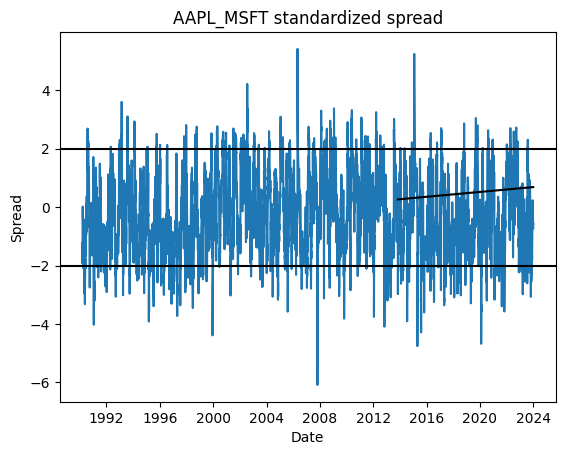

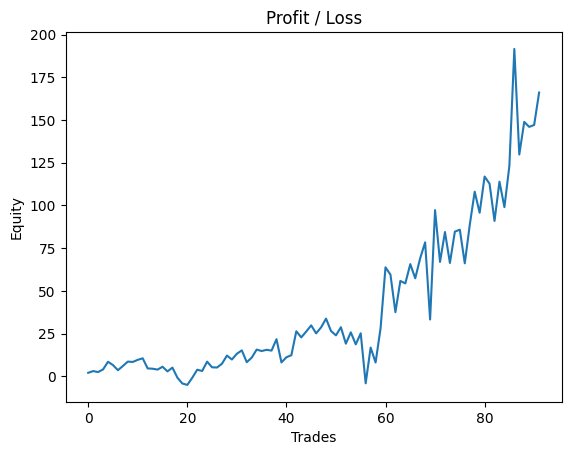

,symbol,pair,pairTradeDirection,entryPrice,exitPrice,entryTime,exitTime,direction,volume,profitLoss,cumSum
0,AAPL,AAPL_MSFT,1,16.289431,17.337313,2013-11-06 00:00:00-05:00,2013-12-13 00:00:00-05:00,1,1.955185,2.048803,2.048803
1,MSFT,AAPL_MSFT,1,31.848848,30.838022,2013-11-06 00:00:00-05:00,2013-12-13 00:00:00-05:00,-1,1.000000,1.010826,3.059629
2,AAPL,AAPL_MSFT,-1,16.752550,17.075888,2014-01-13 00:00:00-05:00,2014-01-24 00:00:00-05:00,-1,1.755002,-0.567458,2.492171
3,MSFT,AAPL_MSFT,-1,29.400763,30.938887,2014-01-13 00:00:00-05:00,2014-01-24 00:00:00-05:00,1,1.000000,1.538124,4.030295
4,AAPL,AAPL_MSFT,1,15.654016,17.860731,2014-01-31 00:00:00-05:00,2014-04-24 00:00:00-04:00,1,2.031721,4.483430,8.513725
...,...,...,...,...,...,...,...,...,...,...,...
87,MSFT,AAPL_MSFT,1,273.951599,335.752747,2023-03-16 00:00:00-04:00,2023-07-26 00:00:00-04:00,-1,1.000000,-61.801147,129.787249
88,AAPL,AAPL_MSFT,-1,192.459961,181.274155,2023-07-27 00:00:00-04:00,2023-08-04 00:00:00-04:00,-1,1.708121,19.106709,148.893958
89,MSFT,AAPL_MSFT,-1,328.744873,325.822418,2023-07-27 00:00:00-04:00,2023-08-04 00:00:00-04:00,1,1.000000,-2.922455,145.971503
90,AAPL,AAPL_MSFT,1,173.759064,174.337555,2023-09-13 00:00:00-04:00,2023-09-22 00:00:00-04:00,1,1.926577,1.114508,147.086011


In [2]:
import datetime

from Backtest import Backtest
from Data import Data
from DataSource import DataSource
from Instrument import Instrument
from Pair import Pair
from DataSet import DataSet
from Model import Model
import pandas as pd
import numpy as np
from Strategy import Strategy
import matplotlib.pyplot as plt
from Utils import Utils

dataSource: DataSource = DataSource("yahoo")
instrument1: Instrument = Instrument("AAPL")
instrument2: Instrument = Instrument("MSFT")

startDate: datetime.datetime = datetime.datetime(1990,1,1,0,0,0)
endDate: datetime.datetime = datetime.datetime(2024,1,1,0,0,0)
timeframe: str = "1d"

data1: Data = Data(dataSource=dataSource,
                   instrument=instrument1,
                   startDate=startDate,
                   endDate=endDate,
                   timeframe=timeframe)

data2: Data = Data(dataSource=dataSource,
                   instrument=instrument2,
                   startDate=startDate,
                   endDate=endDate,
                   timeframe=timeframe)

data1.downloadData()
data1.cleanData()

data2.downloadData()
data2.cleanData()

dataSet: DataSet = DataSet(data1=data1,
                           data2=data2)
data1, data2 = dataSet.cleanDataSet()

pair: Pair = Pair(data1=data1, 
                  data2=data2,
                  window=50)
pair.calculateSpread()
pair.calculateStandardizedSpread()

model: Model = Model(pair=pair)
model.predict(pair.getStandardizedSpread())
fairMarketValue: pd.Series = model.getFairMarketValue()

strategy = Strategy(pair=pair,
                    entryThreshold=2,
                    exitThreshold=fairMarketValue)
strategy.findTrades()

backtest: Backtest = Backtest(strategy=strategy)
backtest.showInfo()
